# Car Price Prediction (Random Forest)

The objective of this analytics is to explore the car market, and find out variables that are highly correlated with price. 
The findings will be used by the management to understand how exactly the prices vary with the independent variables, and they can manipulate the design of the cars and the business strategy accrodingly for better sales.

In [63]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from numpy import array 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 26)

Check the missing data

In [5]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Understand the data type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Split the Column only 

In [9]:
CarCompany=df.CarName.str.split(expand=True).iloc[:,0]
#df. replace('CarName','Car_company', inplace= True)
Car=CarCompany.to_list()

list

In [11]:
df['Car']=Car

df1=df.drop("CarName", axis=1)
df1.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


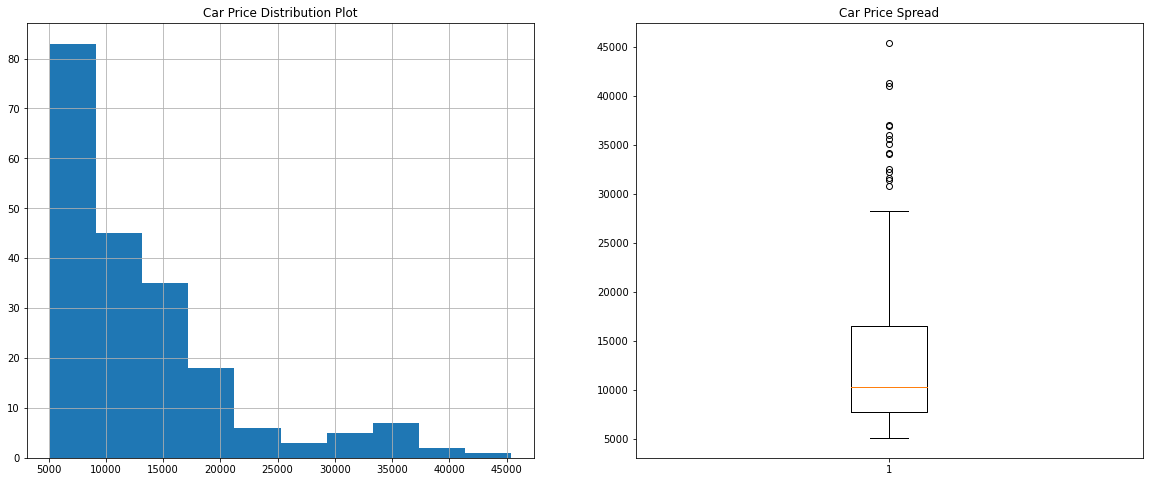

In [12]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
df1.price.hist()

plt.subplot(1,2,2)
plt.title('Car Price Spread')
plt.boxplot(df1.price)
plt.show()

Find out the categorical variables

In [32]:
df1_num = df1.select_dtypes(include=[np.object])
df1_num.columns


Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'Car'],
      dtype='object')

In [14]:
df1.Car.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Cleaning the typo in the car name

In [33]:
df1.Car=df1.Car.str.lower()

In [34]:
df1.Car.replace('maxda','mazda', inplace=True)
df1.Car.replace('porcshce','mazda', inplace=True)
df1.Car.replace('toyouta','toyota', inplace=True)
df1.Car.replace('vokswagen','volkswagen', inplace=True)
df1.Car.replace('vw','volkswagen', inplace=True)

In [17]:
df1.Car.value_counts()

toyota         32
nissan         18
mazda          18
mitsubishi     13
honda          13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
mercury         1
Name: Car, dtype: int64

In [18]:
df1.Car.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Plot distribution for some caterogrical variables.


In [35]:
def distribution(x):
    plt.figure(figsize=(25, 6))
    df1[x].value_counts().plot(kind='bar')
    plt.title(x)

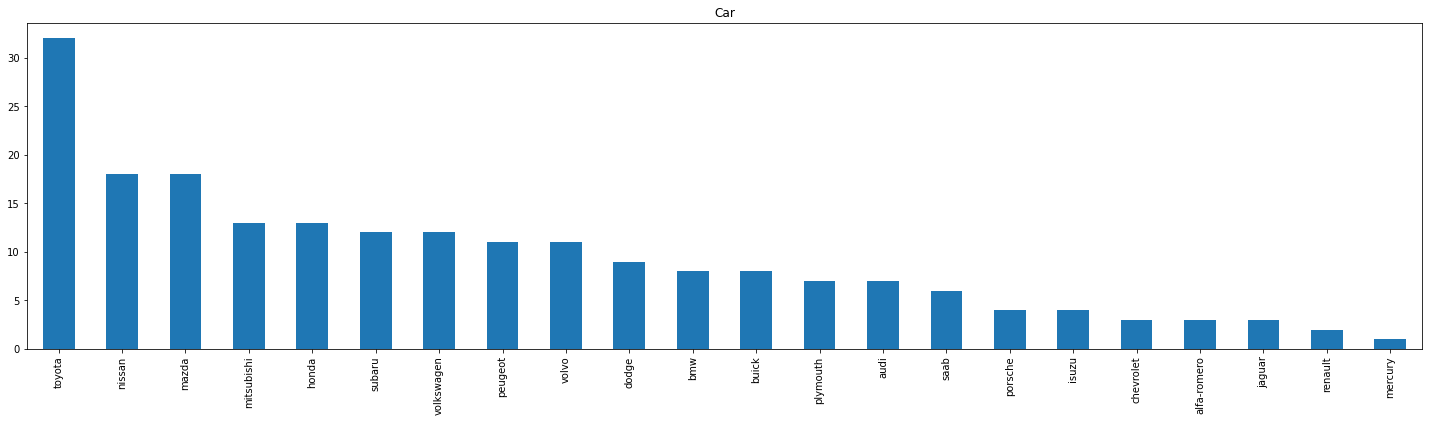

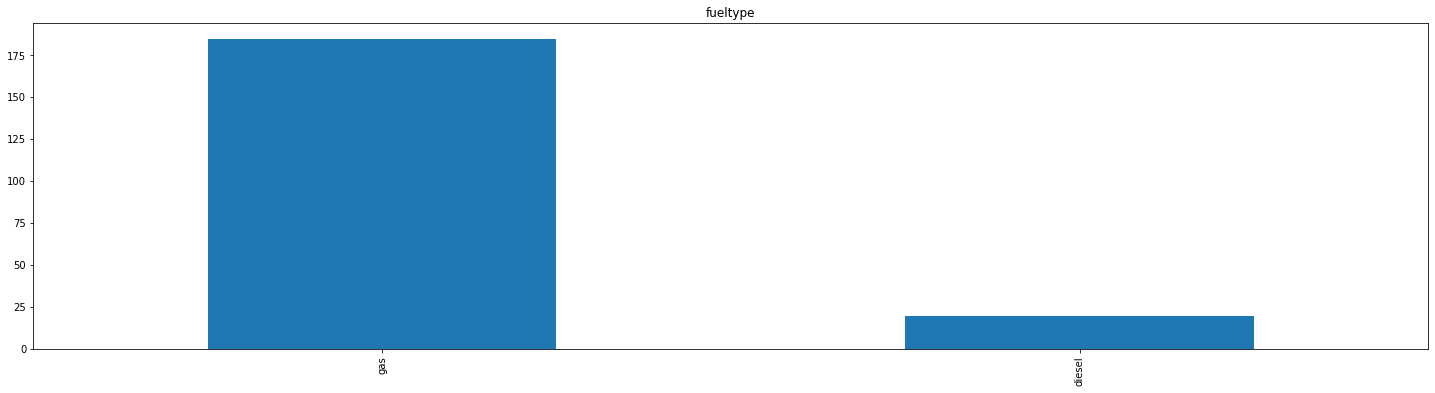

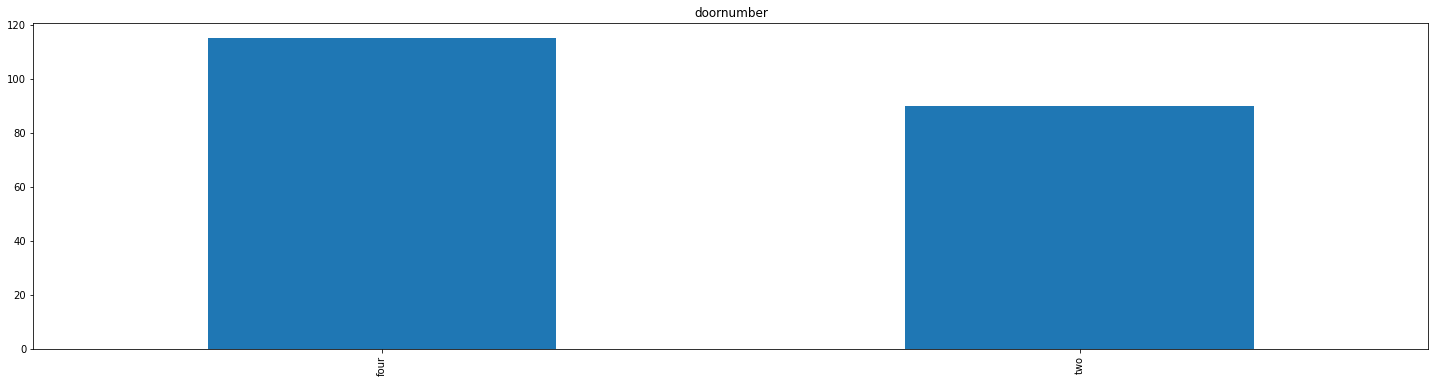

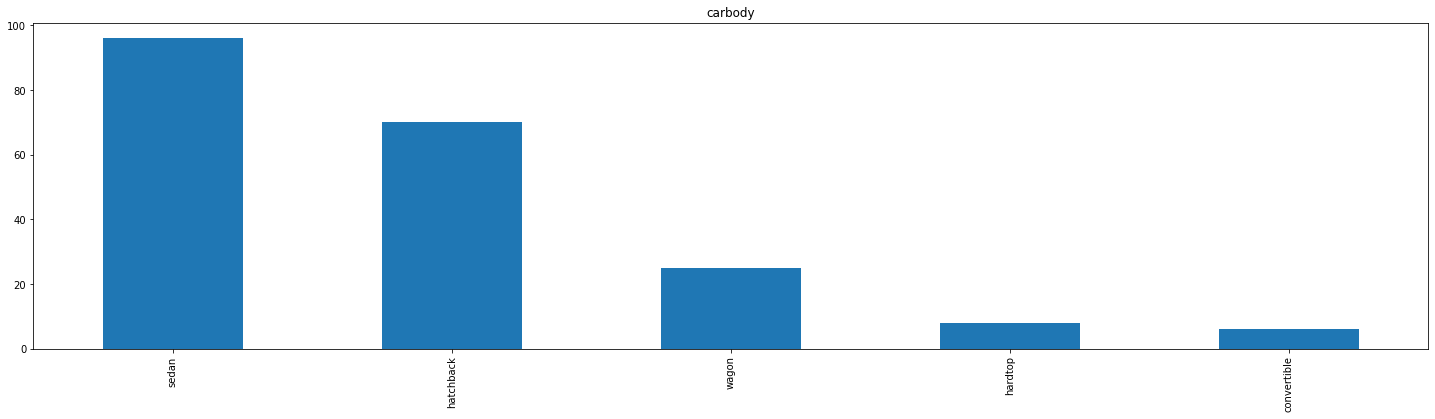

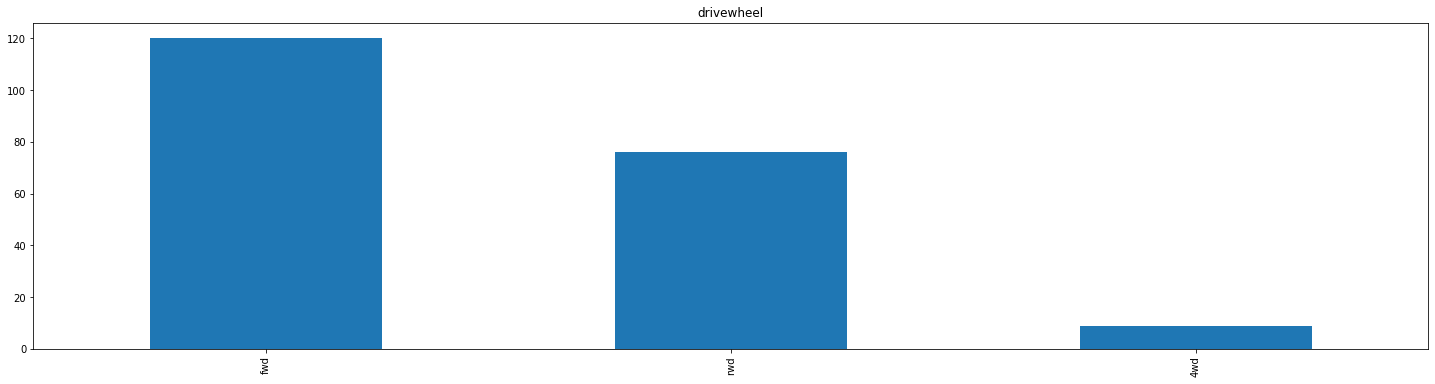

In [36]:
distribution('Car')
distribution('fueltype')
distribution('doornumber')
distribution('carbody')
distribution('drivewheel')

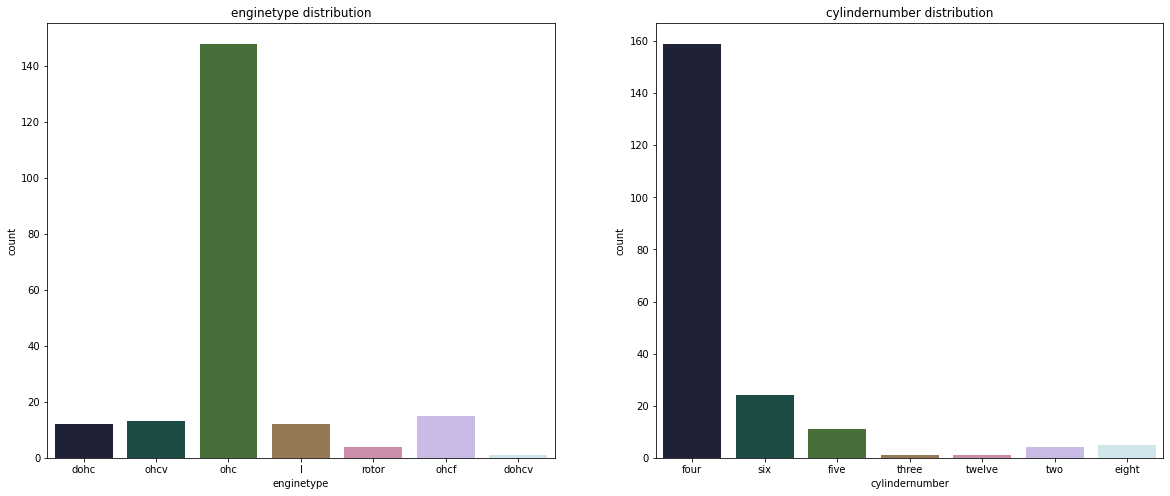

In [37]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('enginetype distribution')
sns.countplot(df1.enginetype, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('cylindernumber distribution')

sns.countplot(df1.cylindernumber, palette=("cubehelix"))

plt.show()


Plot some catergorical variables with price

In [39]:
def withprice(x):
    plt.title(x+' vs Price')
    sns.boxplot(x=df1[x], y=df1.price, palette=("magma"))
    


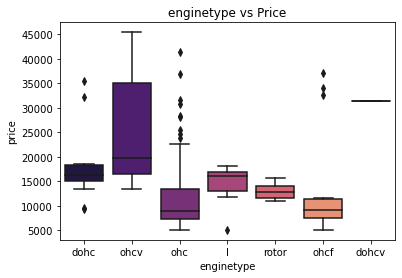

In [40]:
withprice('enginetype')

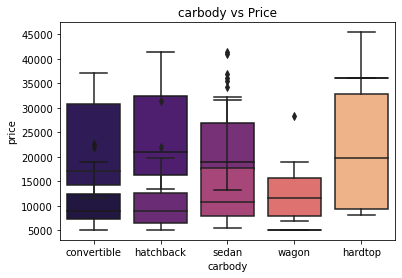

In [41]:
withprice('cylindernumber')
withprice('carbody')

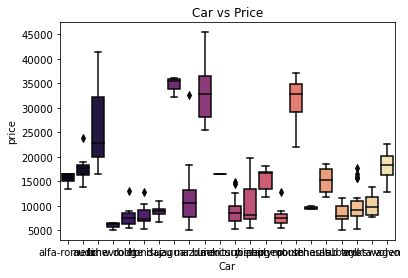

In [42]:
withprice('Car')

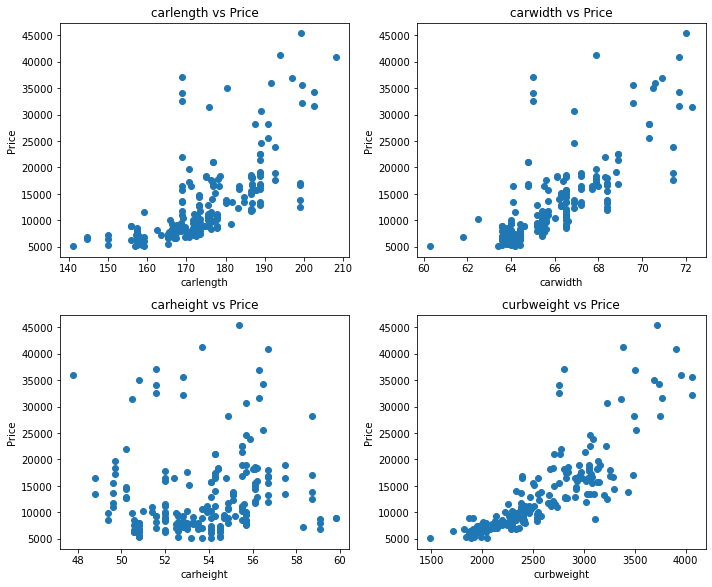

In [27]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df1[x],df1['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

One-code convert catergorical variables to numercial

In [44]:
data= df1.select_dtypes(include=[np.object])

new_data = pd.get_dummies(data)


In [45]:
df1_num=df1.select_dtypes(exclude=[np.object]).drop('car_ID',axis=1)
df1_num

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [46]:
new_df = pd.concat([new_data,df1_num], axis = 1)
new_df.head()


,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,1,1,0,0,1,1,0,0,0,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,0,1,1,0,0,1,1,0,0,0,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,0,1,1,0,0,1,0,0,1,0,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,0,1,1,0,1,0,0,0,0,1,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,0,1,1,0,1,0,0,0,0,1,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Normalized data

In [47]:
def normalization(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [48]:
df3=normalization(new_df)

In [49]:
df3.shape

(205, 75)

In [50]:
df3.head()

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142


In [51]:
y=df3.price
x=df3.drop('price',axis=1)


In [80]:
x.shape

(205, 74)

In [81]:
y.shape

(205,)

Split data and train data

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [54]:
corr = x_train.corrwith(y_train)
corr = corr[corr!=1]
corr1=abs(corr)
corr1.sort_values(ascending= False)

enginesize              0.870483
curbweight              0.838867
horsepower              0.814996
carwidth                0.755427
cylindernumber_four     0.734377
                          ...   
enginetype_rotor        0.007169
fuelsystem_mfi          0.003445
enginetype_dohcv             NaN
cylindernumber_three         NaN
Car_renault                  NaN
Length: 74, dtype: float64

Feature selection, select best features

In [58]:
select = SelectKBest(score_func=f_regression, k=10)
z = select.fit_transform(x_train, y_train) 
 
 
z.shape


(164, 10)

In [59]:
selected = x_train.columns[(select.get_support())]

In [60]:
x_train = x_train[selected]
x_test = x_test[selected]
x_train.shape

(164, 10)

Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)
y_pred_lm=lm.predict(x_test)
r2_linear = r2_score(y_pred_lm, y_test)


RandomForestRegressor

In [66]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 220, random_state = 42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
r2_rf = r2_score(y_pred_rf, y_test)


Lasso

In [67]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV()
lassocv.fit(x_train, y_train)
y_pred_lasso = lassocv.predict(x_test)
r2_lasso = r2_score(y_pred_lasso, y_test)


Ridge

In [71]:
from sklearn.linear_model import Ridge
rr = Ridge()
rr.fit(x_train, y_train)
y_pred_ridge = rr.predict(x_test)
r2_ridge = r2_score(y_pred_ridge, y_test)


In [69]:
model=['LinearRegression','RandomForest','Lasso', 'Ridge']
R2_score=[r2_linear, r2_rf, r2_lasso, r2_ridge]
table=list(zip(model, R2_score))
table


[('LinearRegression', 0.7540971812833086),
 ('RandomForest', 0.8530604299288564),
 ('Lasso', 0.7425295480112146),
 ('Ridge', 0.6880538177832087)]

RandomForest has the highest R2 score. RandomFroest perform the best.

Validation the models

In [72]:
kfold = model_selection.KFold(n_splits=5, random_state=None)
model = LinearRegression()
results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold)
print("Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
print("Variance of kfold accuracies:",results.var())

Accuracy: Final mean:81.649%, Final standard deviation:(6.650%)
Variance of kfold accuracies: 0.004422576717070627


In [73]:
kfold = model_selection.KFold(n_splits=5, random_state=None)
model = RandomForestRegressor()
results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold)
print("Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
print("Variance of kfold accuracies:",results.var())

Accuracy: Final mean:91.588%, Final standard deviation:(2.872%)
Variance of kfold accuracies: 0.0008250319717107715


In [74]:
kfold = model_selection.KFold(n_splits=5, random_state=None)
model = LassoCV()
results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold)
print("Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
print("Variance of kfold accuracies:",results.var())

Accuracy: Final mean:82.443%, Final standard deviation:(7.358%)
Variance of kfold accuracies: 0.005413321998903629


In [75]:
kfold = model_selection.KFold(n_splits=5, random_state=None)
model = Ridge()
results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold)
print("Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
print("Variance of kfold accuracies:",results.var())

Accuracy: Final mean:82.260%, Final standard deviation:(8.292%)
Variance of kfold accuracies: 0.006876512268527403


RandomForest has the highest validation accuracy. RandomFroest performs the best.